<a href="https://colab.research.google.com/github/Brenda-Martinez-Martinez/Project_Spring_2025/blob/main/Predicting_the_GPA_of_Higher_Education_Students_in_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

**Abstract:** This project analyzes the GPA of students in higher education in the Engineering and Educational Science program.

**Student Name:** Brenda Martinez Martinez

# Imports

In [1]:
# Basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# AutoViz
!pip install autoviz
from autoviz.AutoViz_Class import AutoViz_Class

# PyCaret
!pip install pycaret
from pycaret.classification import *

# Warnings
import warnings
warnings.filterwarnings('ignore')

Imported v0.1.905. Please call AutoViz in this sequence:
    AV = AutoViz_Class()
    %matplotlib inline
    dfte = AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=1, lowess=False,
               chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30, save_plot_dir=None)


# Input Data

The Dataset's features are numbered so as to not put the entire title in there.
0-Student ID
1- Student Age (1: 18-21, 2: 22-25, 3: above 26)
2- Sex (1: female, 2: male)
3- Graduated high-school type: (1: private, 2: state, 3: other)
4- Scholarship type: (1: None, 2: 25%, 3: 50%, 4: 75%, 5: Full)
5- Additional work: (1: Yes, 2: No)
6- Regular artistic or sports activity: (1: Yes, 2: No)
7- Do you have a partner: (1: Yes, 2: No)
8- Total salary if available (1: USD 135-200, 2: USD 201-270, 3: USD 271-340, 4: USD 341-410, 5: above 410)
9- Transportation to the university: (1: Bus, 2: Private car/taxi, 3: bicycle, 4: Other)
10- Accommodation type in Cyprus: (1: rental, 2: dormitory, 3: with family, 4: Other)
11- Mothersâ€™ education: (1: primary school, 2: secondary school, 3: high school, 4: university, 5: MSc., 6: Ph.D.)
12- Fathersâ€™ education: (1: primary school, 2: secondary school, 3: high school, 4: university, 5: MSc., 6: Ph.D.)
13- Number of sisters/brothers (if available): (1: 1, 2:, 2, 3: 3, 4: 4, 5: 5 or above)
14- Parental status: (1: married, 2: divorced, 3: died - one of them or both)
15- Mothersâ€™ occupation: (1: retired, 2: housewife, 3: government officer, 4: private sector employee, 5: self-employment, 6: other)
16- Fathersâ€™ occupation: (1: retired, 2: government officer, 3: private sector employee, 4: self-employment, 5: other)
17- Weekly study hours: (1: None, 2: <5 hours, 3: 6-10 hours, 4: 11-20 hours, 5: more than 20 hours)
18- Reading frequency (non-scientific books/journals): (1: None, 2: Sometimes, 3: Often)
19- Reading frequency (scientific books/journals): (1: None, 2: Sometimes, 3: Often)
20- Attendance to the seminars/conferences related to the department: (1: Yes, 2: No)
21- Impact of your projects/activities on your success: (1: positive, 2: negative, 3: neutral)
22- Attendance to classes (1: always, 2: sometimes, 3: never)
23- Preparation to midterm exams 1: (1: alone, 2: with friends, 3: not applicable)
24- Preparation to midterm exams 2: (1: closest date to the exam, 2: regularly during the semester, 3: never)
25- Taking notes in classes: (1: never, 2: sometimes, 3: always)
26- Listening in classes: (1: never, 2: sometimes, 3: always)
27- Discussion improves my interest and success in the course: (1: never, 2: sometimes, 3: always)
28- Flip-classroom: (1: not useful, 2: useful, 3: not applicable)
29- Cumulative grade point average in the last semester (/4.00): (1: <2.00, 2: 2.00-2.49, 3: 2.50-2.99, 4: 3.00-3.49, 5: above 3.49)
30- Expected Cumulative grade point average in the graduation (/4.00): (1: <2.00, 2: 2.00-2.49, 3: 2.50-2.99, 4: 3.00-3.49, 5: above 3.49)
31- Course ID
32- OUTPUT Grade (0: Fail, 1: DD, 2: DC, 3: CC, 4: CB, 5: BB, 6: BA, 7: AA)

In [2]:
# Load Titanic dataset from seaborn (as sample input)
import seaborn as sns
df = pd.read_csv("https://raw.githubusercontent.com/Brenda-Martinez-Martinez/Project_Spring_2025/refs/heads/main/DATA%20(1).csv")
#df.to_csv('titanic.csv', index=False)  # Save a local copy for AutoViz
df.head()

STUDENT ID  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  16  17  18  \
0  STUDENT1   2  2  3  3  1  2  2  1  1   1   1   2   3   1   2   5   3   2   
1  STUDENT2   2  2  3  3  1  2  2  1  1   1   2   3   2   1   2   1   2   2   
2  STUDENT3   2  2  2  3  2  2  2  2  4   2   2   2   2   1   2   1   2   1   
3  STUDENT4   1  1  1  3  1  2  1  2  1   2   1   2   5   1   2   1   3   1   
4  STUDENT5   2  2  1  3  2  2  1  3  1   4   3   3   2   1   2   4   2   1   

   19  20  21  22  23  24  25  26  27  28  29  30  COURSE ID  GRADE  
0   2   1   1   1   1   1   3   2   1   2   1   1      1        1    
1   2   1   1   1   1   1   3   2   3   2   2   3      1        1    
2   2   1   1   1   1   1   2   2   1   1   2   2      1        1    
3   2   1   1   1   1   2   3   2   2   1   3   2      1        1    
4   1   1   1   1   2   1   2   2   2   1   2   2      1        1

# Explore Data

In [3]:
# Summary statistics
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   STUDENT ID  145 non-null    object
 1   1           145 non-null    int64 
 2   2           145 non-null    int64 
 3   3           145 non-null    int64 
 4   4           145 non-null    int64 
 5   5           145 non-null    int64 
 6   6           145 non-null    int64 
 7   7           145 non-null    int64 
 8   8           145 non-null    int64 
 9   9           145 non-null    int64 
 10  10          145 non-null    int64 
 11  11          145 non-null    int64 
 12  12          145 non-null    int64 
 13  13          145 non-null    int64 
 14  14          145 non-null    int64 
 15  15          145 non-null    int64 
 16  16          145 non-null    int64 
 17  17          145 non-null    int64 
 18  18          145 non-null    int64 
 19  19          145 non-null    int64 
 20  20        

In [4]:
# Statistical summary
df.describe()

1           2           3           4           5           6      \
count  145.000000  145.000000  145.000000  145.000000  145.000000  145.000000   
mean     1.620690    1.600000    1.944828    3.572414    1.662069    1.600000   
std      0.613154    0.491596    0.537216    0.805750    0.474644    0.491596   
min      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   
25%      1.000000    1.000000    2.000000    3.000000    1.000000    1.000000   
50%      2.000000    2.000000    2.000000    3.000000    2.000000    2.000000   
75%      2.000000    2.000000    2.000000    4.000000    2.000000    2.000000   
max      3.000000    2.000000    3.000000    5.000000    2.000000    2.000000   

            7           8           9          10          11          12      \
count  145.000000  145.000000  145.000000  145.000000  145.000000  145.000000   
mean     1.579310    1.627586    1.620690    1.731034    2.282759    2.634483   
std      0.495381    1.020245    1.061112    0.783999    1.223062    1.147544   
min      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   
25%      1.000000    1.000000    1.000000    1.000000    1.000000    2.000000   
50%      2.000000    1.000000    1.000000    2.000000    2.000000    3.000000   
75%      2.000000    2.000000    2.000000    2.000000    3.000000    3.000000   
max      2.000000    5.000000    4.000000    4.000000    6.000000    6.000000   

           13          14          15          16          17          18      \
count  145.000000  145.000000  145.000000  145.000000  145.000000  145.000000   
mean     2.806897    1.172414    2.358621    2.806897    2.200000    1.944828   
std      1.360640    0.490816    0.805156    1.329664    0.917424    0.562476   
min      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   
25%      2.000000    1.000000    2.000000    2.000000    2.000000    2.000000   
50%      3.000000    1.000000    2.000000    3.000000    2.000000    2.000000   
75%      4.000000    1.000000    2.000000    4.000000    3.000000    2.000000   
max      5.000000    3.000000    5.000000    5.000000    5.000000    3.000000   

           19          20          21          22          23          24      \
count  145.000000  145.000000  145.000000  145.000000  145.000000  145.000000   
mean     2.013793    1.213793    1.206897    1.241379    1.337931    1.165517   
std      0.539884    0.411404    0.588035    0.429403    0.614870    0.408483   
min      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   
25%      2.000000    1.000000    1.000000    1.000000    1.000000    1.000000   
50%      2.000000    1.000000    1.000000    1.000000    1.000000    1.000000   
75%      2.000000    1.000000    1.000000    1.000000    2.000000    1.000000   
max      3.000000    2.000000    3.000000    2.000000    3.000000    3.000000   

           25          26          27          28          29          30      \
count  145.000000  145.000000  145.000000  145.000000  145.000000  145.000000   
mean     2.544828    2.055172    2.393103    1.806897    3.124138    2.724138   
std      0.564940    0.674736    0.604343    0.810492    1.301083    0.916536   
min      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   
25%      2.000000    2.000000    2.000000    1.000000    2.000000    2.000000   
50%      3.000000    2.000000    2.000000    2.000000    3.000000    3.000000   
75%      3.000000    3.000000    3.000000    2.000000    4.000000    3.000000   
max      3.000000    3.000000    3.000000    3.000000    5.000000    4.000000   

        COURSE ID     GRADE    
count  145.000000  145.000000  
mean     4.131034    3.227586  
std      3.260145    2.197678  
min      1.000000    0.000000  
25%      1.000000    1.000000  
50%      3.000000    3.000000  
75%      7.000000    5.000000  
max      9.000000    7.000000

In [5]:
# Analysis of Nulls
#df.isnull().sum()

Shape of your Data Set loaded: (145, 33)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Number of Numeric Columns =  0
    Number of Integer-Categorical Columns =  26
    Number of String-Categorical Columns =  0
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  6
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  1
    Number of Columns to Delete =  0
    33 Predictors classified...
        1 variable(s) removed since they were ID or low-information variables
        List of variables removed: ['STUDENT ID']
26 numeric variables in data exceeds limit, taking to

Number of All Scatter Plots = 351


ValueError: Image size of 1484x65853 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 1500x65200 with 325 Axes>

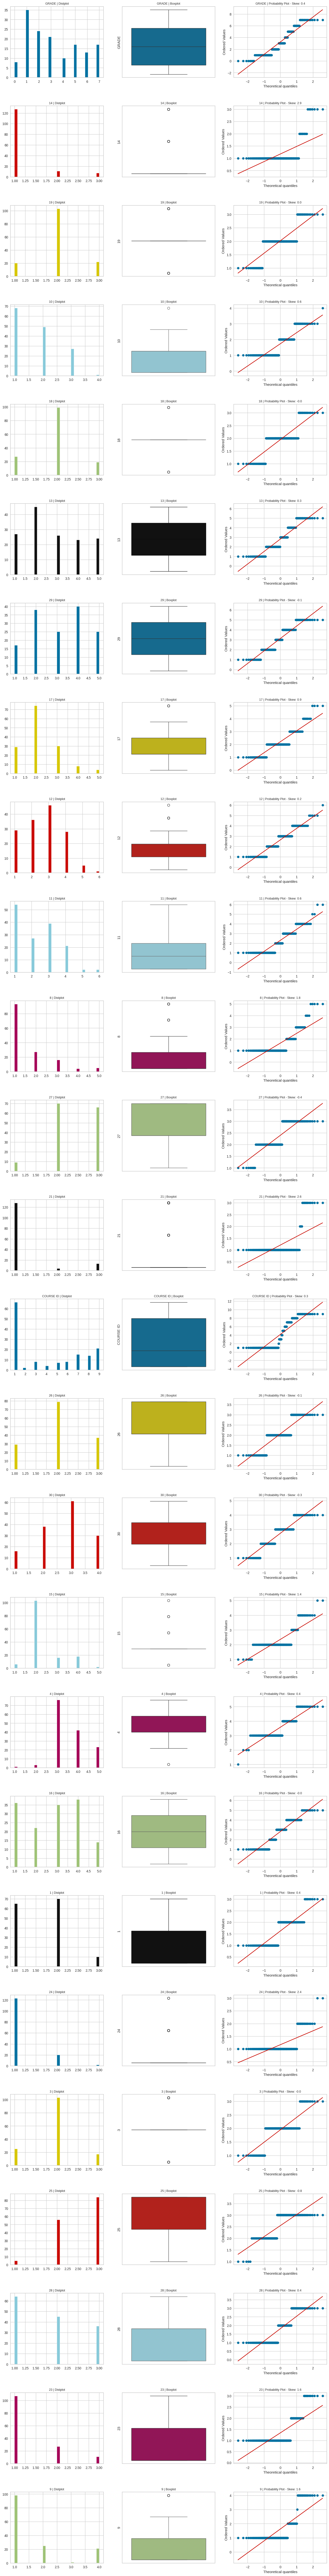

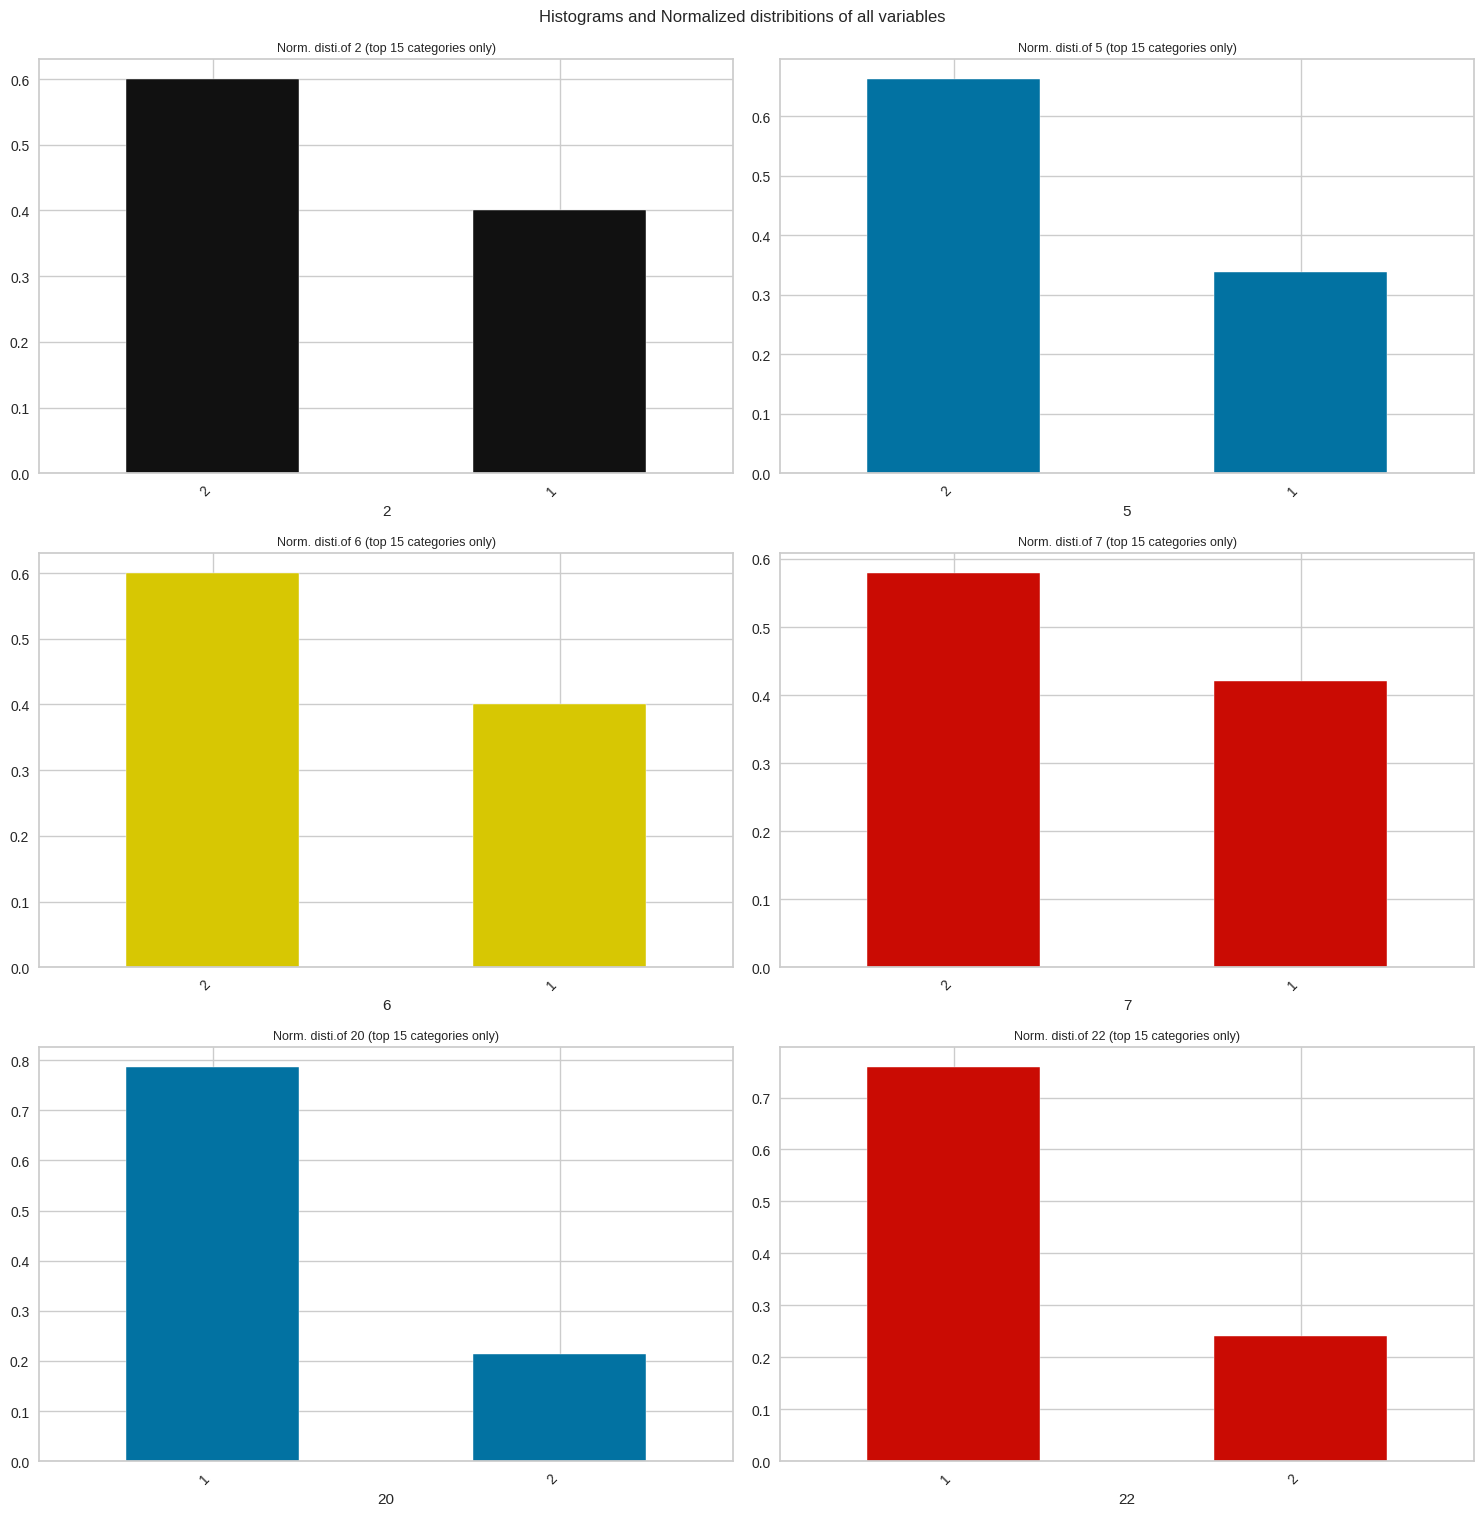

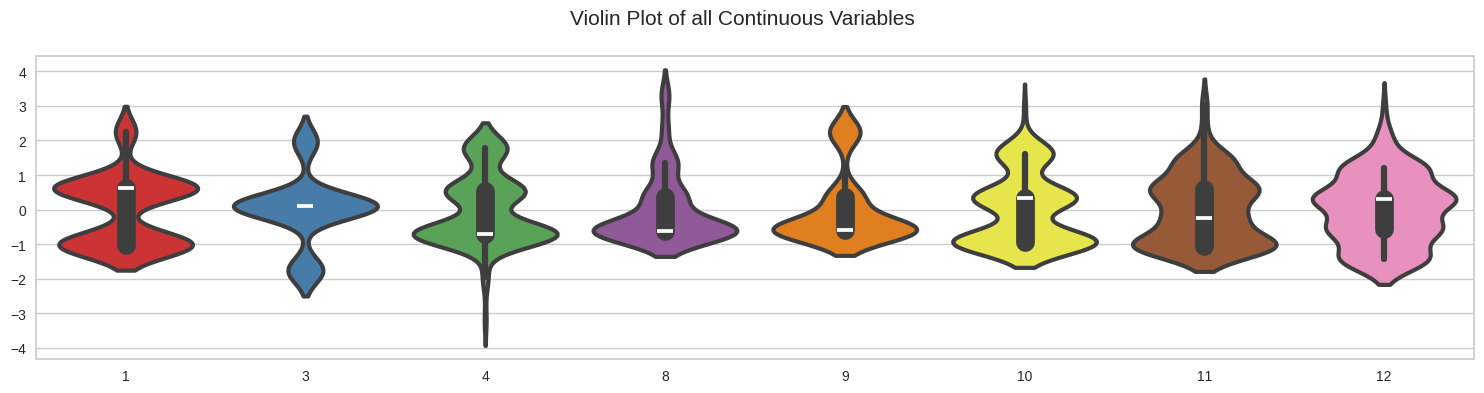

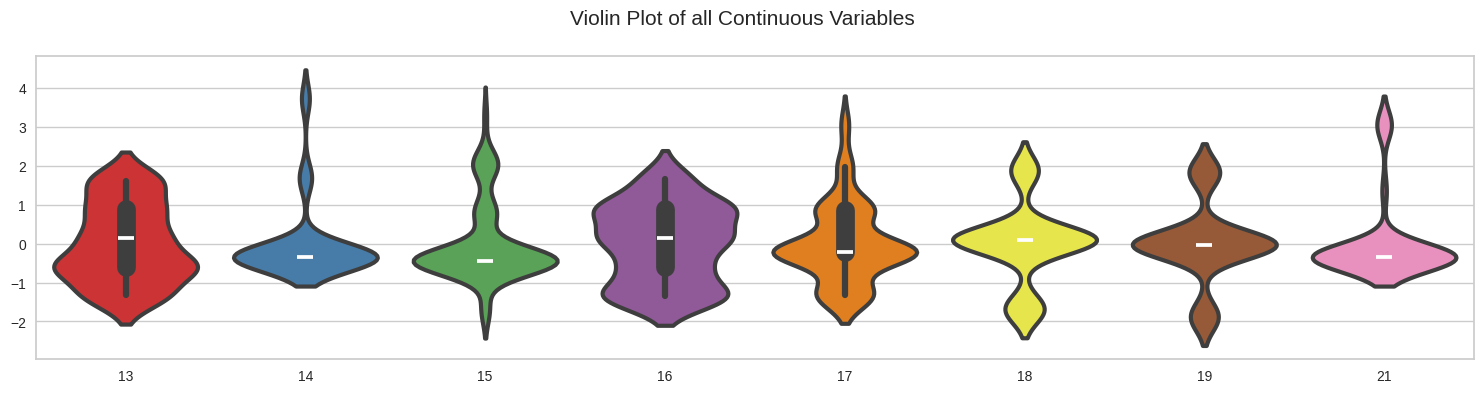

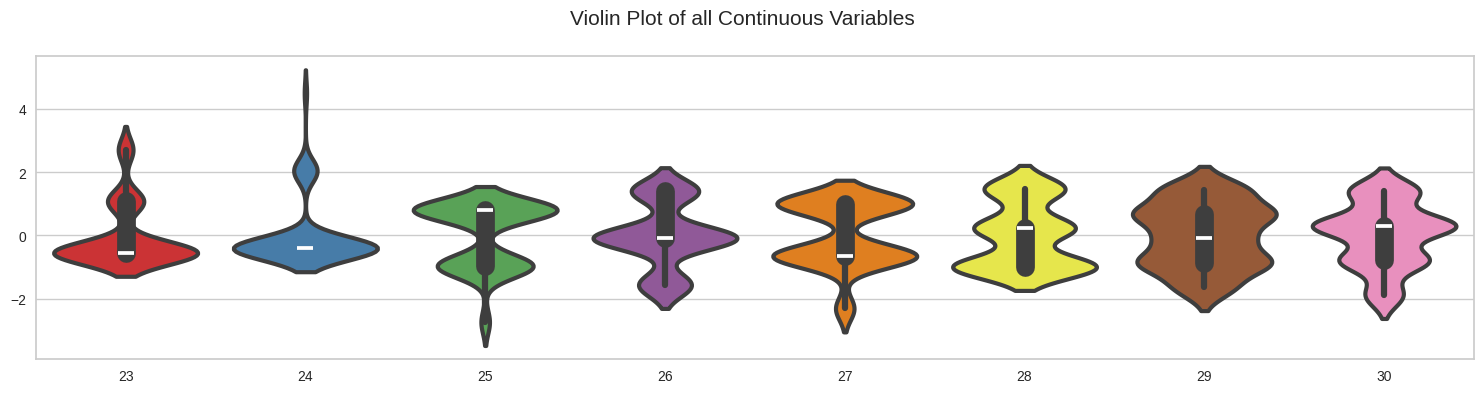

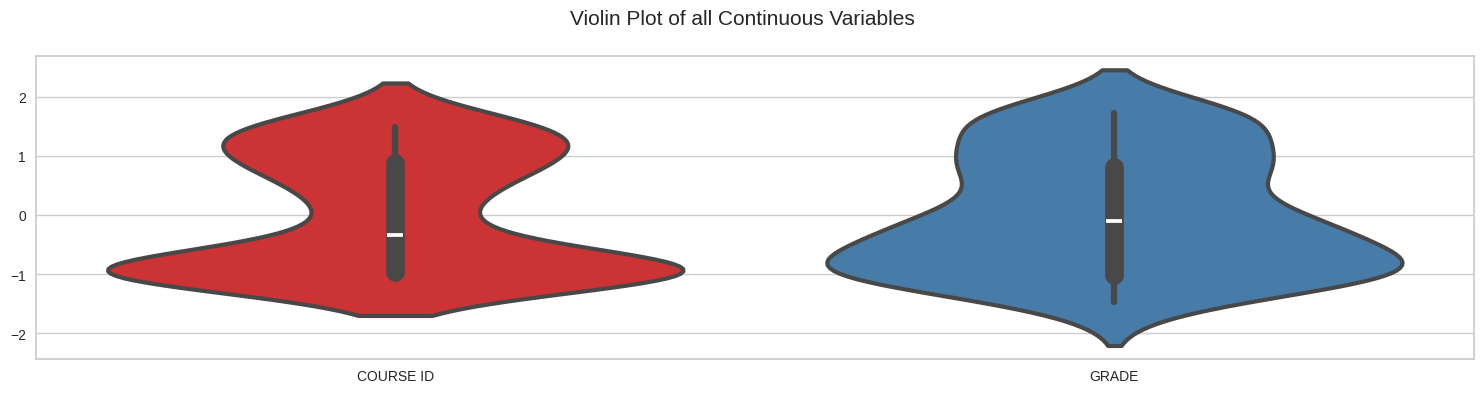

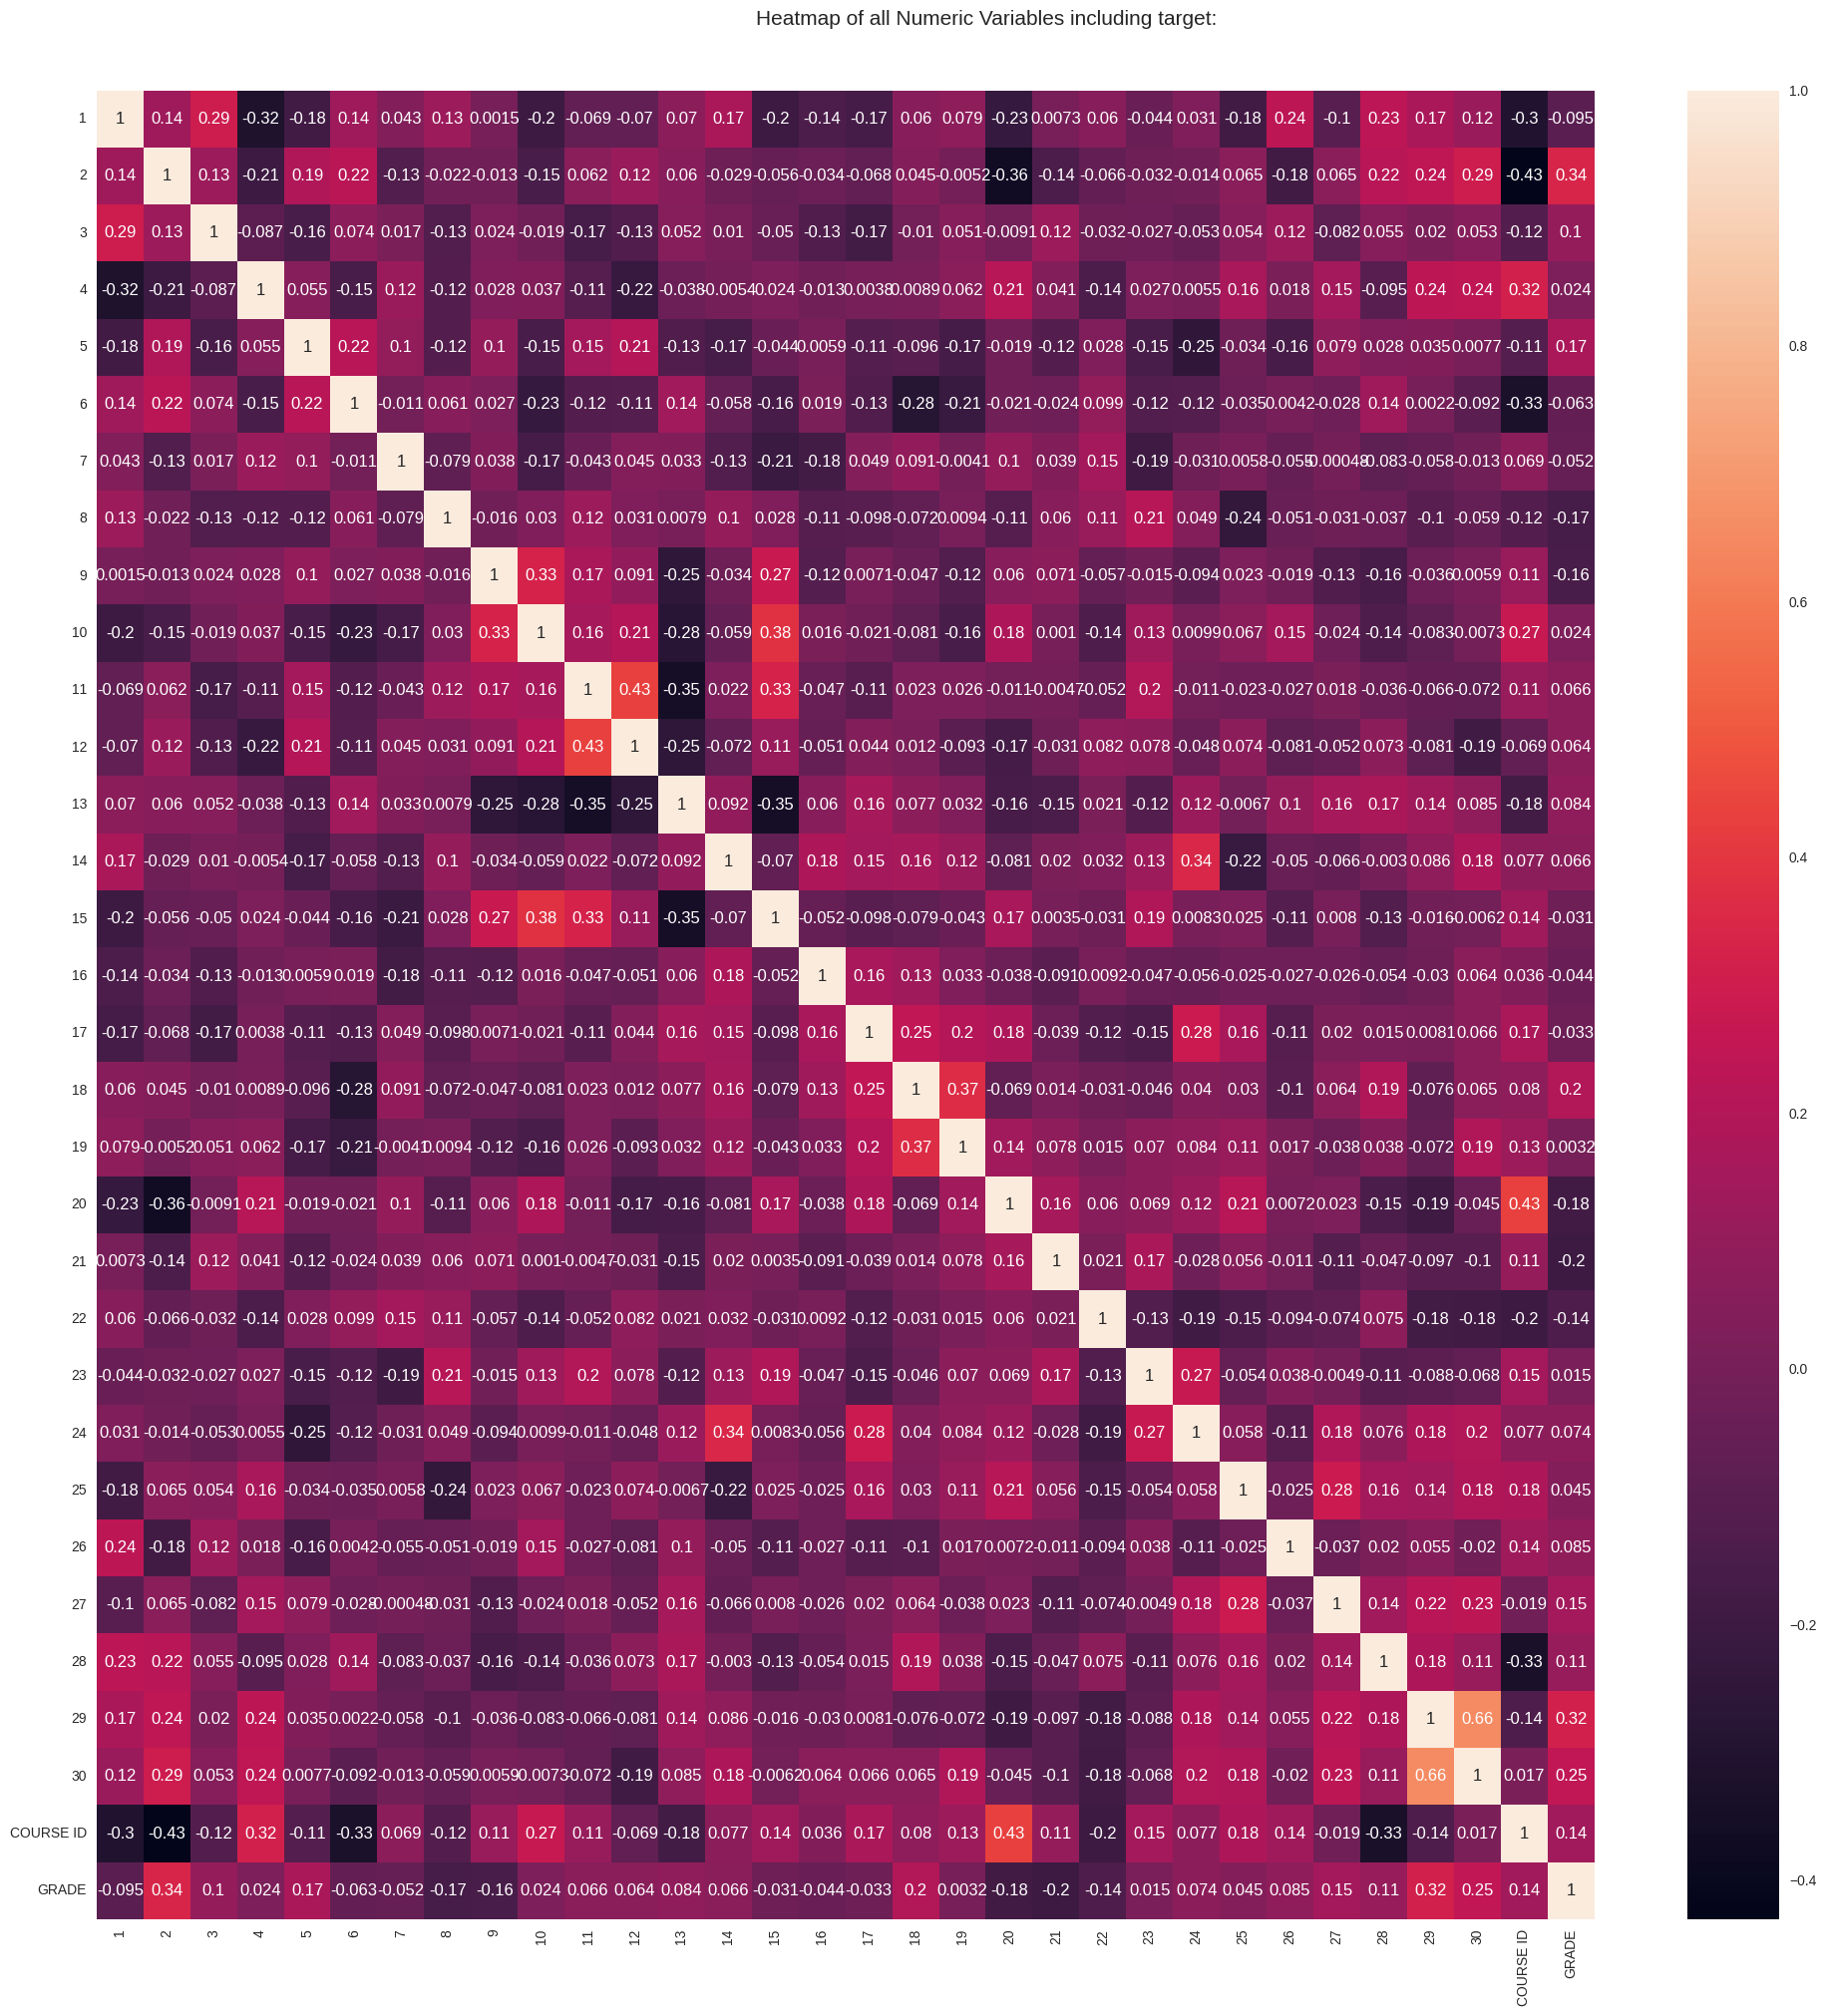

All Plots done
Time to run AutoViz = 95 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


In [11]:
# AutoViz visualization
AV = AutoViz_Class()
auto_viz = AV.AutoViz('https://raw.githubusercontent.com/Brenda-Martinez-Martinez/Project_Spring_2025/refs/heads/main/DATA%20(1).csv')

# Prepare Data

In [7]:
# Drop columns with many missing values or irrelevant
df_clean = df.drop(columns=['7', '11', '12', '15', '16', '5', '10', '14', '13'])
# Fill missing values
#df_clean['age'] = df_clean['age'].fillna(df_clean['age'].median())
#df_clean['embarked'] = df_clean['embarked'].fillna(df_clean['embarked'].mode()[0])
df_clean.dropna(inplace=True)
df_clean.head()

STUDENT ID  1  2  3  4  6  8  9  17  18  19  20  21  22  23  24  25  26  27  \
0  STUDENT1   2  2  3  3  2  1  1   3   2   2   1   1   1   1   1   3   2   1   
1  STUDENT2   2  2  3  3  2  1  1   2   2   2   1   1   1   1   1   3   2   3   
2  STUDENT3   2  2  2  3  2  2  4   2   1   2   1   1   1   1   1   2   2   1   
3  STUDENT4   1  1  1  3  2  2  1   3   1   2   1   1   1   1   2   3   2   2   
4  STUDENT5   2  2  1  3  2  3  1   2   1   1   1   1   1   2   1   2   2   2   

   28  29  30  COURSE ID  GRADE  
0   2   1   1      1        1    
1   2   2   3      1        1    
2   1   2   2      1        1    
3   1   3   2      1        1    
4   1   2   2      1        1

# Model

In [8]:
# Setup PyCaret
clf1 = setup(data=df_clean, target='30', session_id=123)

# Compare models
compare_models()

Processing:   0%|          | 0/65 [00:00<?, ?it/s]

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     monotonic_cst=None, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=123, verbose=0,
                     warm_start=False)

# Evaluate

In [9]:
# Create and evaluate a Random Forest model
rf_model = create_model('rf')
evaluate_model(rf_model)
predict_model(rf_model)

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

STUDENT ID  1  2  3  4  6  8  9  17  18  ...  25  26  27  28  29  \
67    STUDENT68  2  2  3  3  1  3  1   2   2  ...   2   2   1   2   2   
31    STUDENT32  3  2  2  3  2  1  1   2   2  ...   3   3   2   3   4   
115  STUDENT116  2  1  2  5  2  1  1   3   3  ...   3   2   3   2   2   
110  STUDENT111  2  2  2  3  2  2  4   2   2  ...   2   2   2   1   2   
78    STUDENT79  2  1  2  4  1  1  1   2   3  ...   3   3   2   2   2   
2      STUDENT3  2  2  2  3  2  2  4   2   1  ...   2   2   1   1   2   
114  STUDENT115  2  1  2  5  1  4  1   2   2  ...   2   2   1   2   1   
20    STUDENT21  1  2  2  5  2  1  4   4   2  ...   3   1   2   3   4   
93    STUDENT94  1  2  2  1  2  1  1   5   2  ...   3   3   3   2   2   
64    STUDENT65  2  2  3  5  2  1  1   1   2  ...   3   2   3   1   4   
113  STUDENT114  2  1  3  3  2  1  4   2   2  ...   2   2   1   1   1   
10    STUDENT11  1  1  1  3  2  3  2   1   1  ...   2   2   2   2   1   
104  STUDENT105  1  1  2  3  2  1  2   2   2  ...   2   3   2   2   1   
69    STUDENT70  2  1  2  4  2  1  1   1   1  ...   3   2   3   1   3   
123  STUDENT124  2  1  3  3  2  3  1   2   2  ...   3   3   2   1   1   
57    STUDENT58  2  2  2  3  1  1  1   2   3  ...   3   2   3   1   5   
132  STUDENT133  1  1  1  5  1  1  1   2   2  ...   3   2   3   1   5   
88    STUDENT89  1  2  2  4  1  1  1   2   2  ...   3   1   2   3   5   
53    STUDENT54  2  1  2  3  1  2  1   1   2  ...   2   2   2   2   3   
73    STUDENT74  2  2  2  4  2  1  1   3   1  ...   3   2   3   1   5   
62    STUDENT63  2  2  2  3  2  1  4   3   2  ...   2   3   3   2   5   
44    STUDENT45  2  2  3  3  2  1  1   2   2  ...   3   2   2   1   4   
19    STUDENT20  1  2  1  3  2  2  2   4   2  ...   3   2   2   3   2   
126  STUDENT127  1  1  1  4  1  3  2   4   2  ...   3   3   3   1   2   
40    STUDENT41  1  2  1  3  2  2  1   1   2  ...   3   1   2   1   2   
32    STUDENT33  2  1  2  3  2  2  1   2   2  ...   2   2   2   1   2   
36    STUDENT37  2  2  3  4  2  3  1   1   1  ...   2   1   2   1   4   
43    STUDENT44  1  2  2  3  2  1  1   2   2  ...   3   1   3   3   3   
70    STUDENT71  1  2  2  4  1  1  1   2   2  ...   2   2   3   1   5   
79    STUDENT80  2  2  2  4  2  1  1   1   2  ...   3   3   3   2   4   
66    STUDENT67  2  2  2  3  2  1  1   2   2  ...   3   2   2   3   5   
1      STUDENT2  2  2  3  3  2  1  1   2   2  ...   3   2   3   2   2   
136  STUDENT137  1  1  2  3  1  1  2   2   2  ...   3   2   2   1   2   
41    STUDENT42  3  2  2  3  2  2  1   3   2  ...   3   2   2   3   4   
21    STUDENT22  1  2  2  5  2  1  4   3   2  ...   3   1   3   3   3   
51    STUDENT52  2  1  3  3  1  1  1   1   2  ...   2   3   3   1   3   
96    STUDENT97  1  2  2  4  1  1  2   2   3  ...   3   2   3   2   2   
116  STUDENT117  2  1  2  5  2  1  1   3   3  ...   3   3   3   1   2   
111  STUDENT112  1  1  1  5  1  1  1   1   2  ...   3   1   3   3   4   
121  STUDENT122  2  1  2  3  1  1  2   5   3  ...   1   1   1   1   1   
91    STUDENT92  2  2  2  5  1  1  1   2   2  ...   2   3   3   2   5   
12    STUDENT13  1  1  1  4  2  1  1   3   2  ...   2   2   2   3   4   
71    STUDENT72  1  1  3  4  2  1  1   2   2  ...   2   3   3   3   2   
6      STUDENT7  1  2  2  4  2  1  1   2   2  ...   3   3   3   3   4   

     COURSE ID  GRADE  30  prediction_label  prediction_score  
67       2        1     3          3               0.52        
31       1        3     3          3               0.74        
115      8        1     2          3               0.83        
110      8        2     3          3               0.69        
78       4        4     2          3               0.83        
2        1        1     2          3               0.58        
114      8        2     1          3               0.77        
20       1        1     4          3               0.80        
93       6        4     2          3               0.61        
64       1        3     3          3               0.73        
113      8     

# Tune, Best Model

In [10]:
tuned_rf = tune_model(rf_model)
final_rf = finalize_model(tuned_rf)
save_model(final_rf, 'final_rf_model')

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['1', '2', '3', '4', '6', '8', '9',
                                              '17', '18', '19', '20', '21', '22',
                                              '23', '24', '25', '26', '27', '28',
                                              '29', 'COURSE ID', 'GRADE'],
                                     transformer=SimpleImputer(a...
                  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                                         class_weight='balanced_subsample',
                                         criterion='gini', max_depth=4,
                                         max_features='sqrt',
         

# References

- Titanic dataset from seaborn
- PyCaret Documentation: https://pycaret.gitbook.io/docs/
- AutoViz GitHub: https://github.com/AutoViML/AutoViz